In [205]:
import pandas as pd
import seaborn as sns
import numpy as np

sns.set(font_scale=1.5)
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

from sklearn import datasets, metrics
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

import joblib
import pickle

In [3]:
df = pd.read_csv('/Users/T/GA/DSI13-lessons/project/project-capstone/part-02/df_features.csv')

In [4]:
df

,Unnamed: 0,mood,log_mel_spec,log_mel_spec_std,log_mel_spec_skew,chroma_stft,chroma_stft_std,chroma_stft_skew,chroma_cqt_mean,chroma_cqt_mean_std,...,spectral_contrast_skew,zcr_sum,zcr_mean,zcr_std,mfcc,mfcc_std,mfcc_skew,tonnetz_mean,tonnetz_std,tonnetz_skew
0,0,exciting,-75.824570,9.902518,3.603244,0.577923,0.262859,-0.014844,0.816937,0.141965,...,1.299484,66.604980,0.154536,0.139969,2.205316,39.518650,-5.380673,0.000172,0.025291,-0.519153
1,1,exciting,-76.798744,7.966996,3.280113,0.377721,0.300713,0.786658,0.484741,0.275779,...,1.388592,61.156250,0.141894,0.097881,-2.085029,47.364246,-3.129096,-0.008226,0.118967,0.641781
2,2,exciting,-60.356552,15.647021,0.700132,0.293579,0.284576,1.423595,0.431696,0.256040,...,1.469404,63.837891,0.148116,0.041995,3.736984,19.305376,2.261297,-0.000587,0.123545,0.361105
3,3,angry,-67.746964,14.032617,1.436807,0.641435,0.219265,-0.022891,0.567568,0.213317,...,1.481570,36.898926,0.085612,0.032686,10.997046,21.626915,1.345173,-0.011945,0.056751,-0.273291
4,4,tender,-73.375252,12.776218,2.076025,0.232565,0.286256,1.707878,0.284187,0.282817,...,1.396391,38.733398,0.089869,0.022059,-2.166205,47.389797,-1.061247,0.098521,0.202327,-0.184819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13576,13922,happy,-54.483967,16.947329,0.426021,0.384615,0.280429,0.998030,0.569940,0.222955,...,1.130970,65.498535,0.151969,0.036415,5.252286,19.316759,2.347364,-0.022571,0.068283,-0.444928
13577,13923,tender,-79.047958,5.594672,7.106703,0.209073,0.304137,1.695157,0.266319,0.293801,...,0.287753,20.562500,0.047709,0.022086,-22.261473,102.865326,-3.681669,0.007968,0.250678,-0.142805
13578,13924,angry,-60.004910,16.487732,0.437710,0.426259,0.278116,0.713405,0.534498,0.230911,...,1.462823,56.504395,0.131101,0.045244,3.863096,28.275099,1.729230,0.019969,0.069109,0.097486
13579,13925,tender,-69.785950,16.016172,1.560179,0.285586,0.296310,1.350697,0.262521,0.278525,...,1.573951,30.363770,0.070450,0.021526,3.869421,42.087711,0.250034,0.096096,0.215639,0.163428


In [5]:
del df['Unnamed: 0']

In [6]:
df.head()

,mood,log_mel_spec,log_mel_spec_std,log_mel_spec_skew,chroma_stft,chroma_stft_std,chroma_stft_skew,chroma_cqt_mean,chroma_cqt_mean_std,chroma_cqt_mean_skew,...,spectral_contrast_skew,zcr_sum,zcr_mean,zcr_std,mfcc,mfcc_std,mfcc_skew,tonnetz_mean,tonnetz_std,tonnetz_skew
0,exciting,-75.824570,9.902518,3.603244,0.577923,0.262859,-0.014844,0.816937,0.141965,-0.897585,...,1.299484,66.604980,0.154536,0.139969,2.205316,39.518650,-5.380673,0.000172,0.025291,-0.519153
1,exciting,-76.798744,7.966996,3.280113,0.377721,0.300713,0.786658,0.484741,0.275779,0.376750,...,1.388592,61.156250,0.141894,0.097881,-2.085029,47.364246,-3.129096,-0.008226,0.118967,0.641781
2,exciting,-60.356552,15.647021,0.700132,0.293579,0.284576,1.423595,0.431696,0.256040,0.994658,...,1.469404,63.837891,0.148116,0.041995,3.736984,19.305376,2.261297,-0.000587,0.123545,0.361105
3,angry,-67.746964,14.032617,1.436807,0.641435,0.219265,-0.022891,0.567568,0.213317,0.545056,...,1.481570,36.898926,0.085612,0.032686,10.997046,21.626915,1.345173,-0.011945,0.056751,-0.273291
4,tender,-73.375252,12.776218,2.076025,0.232565,0.286256,1.707878,0.284187,0.282817,1.604961,...,1.396391,38.733398,0.089869,0.022059,-2.166205,47.389797,-1.061247,0.098521,0.202327,-0.184819


In [7]:
#Enumerate target variables

def score_to_numeric(x):
    if x=='exciting':
        return 1
    if x=='tender':
        return 2
    if x=='sad':
        return 3
    if x=='scary':
        return 4
    if x=='happy':
        return 5
    if x=='angry':
        return 6
    if x=='funny':
        return 7

In [8]:
df['mood_num'] = df['mood'].apply(score_to_numeric)
df.head()

,mood,log_mel_spec,log_mel_spec_std,log_mel_spec_skew,chroma_stft,chroma_stft_std,chroma_stft_skew,chroma_cqt_mean,chroma_cqt_mean_std,chroma_cqt_mean_skew,...,zcr_sum,zcr_mean,zcr_std,mfcc,mfcc_std,mfcc_skew,tonnetz_mean,tonnetz_std,tonnetz_skew,mood_num
0,exciting,-75.824570,9.902518,3.603244,0.577923,0.262859,-0.014844,0.816937,0.141965,-0.897585,...,66.604980,0.154536,0.139969,2.205316,39.518650,-5.380673,0.000172,0.025291,-0.519153,1
1,exciting,-76.798744,7.966996,3.280113,0.377721,0.300713,0.786658,0.484741,0.275779,0.376750,...,61.156250,0.141894,0.097881,-2.085029,47.364246,-3.129096,-0.008226,0.118967,0.641781,1
2,exciting,-60.356552,15.647021,0.700132,0.293579,0.284576,1.423595,0.431696,0.256040,0.994658,...,63.837891,0.148116,0.041995,3.736984,19.305376,2.261297,-0.000587,0.123545,0.361105,1
3,angry,-67.746964,14.032617,1.436807,0.641435,0.219265,-0.022891,0.567568,0.213317,0.545056,...,36.898926,0.085612,0.032686,10.997046,21.626915,1.345173,-0.011945,0.056751,-0.273291,6
4,tender,-73.375252,12.776218,2.076025,0.232565,0.286256,1.707878,0.284187,0.282817,1.604961,...,38.733398,0.089869,0.022059,-2.166205,47.389797,-1.061247,0.098521,0.202327,-0.184819,2


In [9]:
df.columns

Index(['mood', 'log_mel_spec', 'log_mel_spec_std', 'log_mel_spec_skew',
       'chroma_stft', 'chroma_stft_std', 'chroma_stft_skew', 'chroma_cqt_mean',
       'chroma_cqt_mean_std', 'chroma_cqt_mean_skew', 'chroma_cens_means',
       'chroma_cens_means_std', 'chroma_cens_means_skew', 'specral_centroids',
       'specral_centroids_std', 'specral_centroids_skew', 'spec_bandwidth_2',
       'spec_bandwidth_2_std', 'spec_bandwidth_2_skew', 'spec_bandwidth_3',
       'spec_bandwidth_3_std', 'spec_bandwidth_3_skew', 'spec_bandwidth_4',
       'spec_bandwidth_4_std', 'spec_bandwidth_4_skew', 'spectral_rolloff',
       'spectral_rolloff_std', 'spectral_rolloff_skew', 'spectral_contrast',
       'spectral_contrast_std', 'spectral_contrast_skew', 'zcr_sum',
       'zcr_mean', 'zcr_std', 'mfcc', 'mfcc_std', 'mfcc_skew', 'tonnetz_mean',
       'tonnetz_std', 'tonnetz_skew', 'mood_num'],
      dtype='object')

# Pre-processing

In [10]:
X = df[['log_mel_spec', 'log_mel_spec_std', 'log_mel_spec_skew',
       'chroma_stft', 'chroma_stft_std', 'chroma_stft_skew', 'chroma_cqt_mean',
       'chroma_cqt_mean_std', 'chroma_cqt_mean_skew', 'chroma_cens_means',
       'chroma_cens_means_std', 'chroma_cens_means_skew', 'specral_centroids',
       'specral_centroids_std', 'specral_centroids_skew', 'spec_bandwidth_2',
       'spec_bandwidth_2_std', 'spec_bandwidth_2_skew', 'spec_bandwidth_3',
       'spec_bandwidth_3_std', 'spec_bandwidth_3_skew', 'spec_bandwidth_4',
       'spec_bandwidth_4_std', 'spec_bandwidth_4_skew', 'spectral_rolloff',
       'spectral_rolloff_std', 'spectral_rolloff_skew', 'spectral_contrast',
       'spectral_contrast_std', 'spectral_contrast_skew', 'zcr_sum',
       'zcr_mean', 'zcr_std', 'mfcc', 'mfcc_std', 'mfcc_skew', 'tonnetz_mean',
       'tonnetz_std', 'tonnetz_skew']]

In [11]:
y = df['mood_num']

In [12]:
y.value_counts()

1    4634
2    3366
3    1372
4    1364
5    1144
6     868
7     833
Name: mood_num, dtype: int64

In [13]:
baseline = pd.Series(y).value_counts(normalize=True).max()
baseline

0.34121198733524777

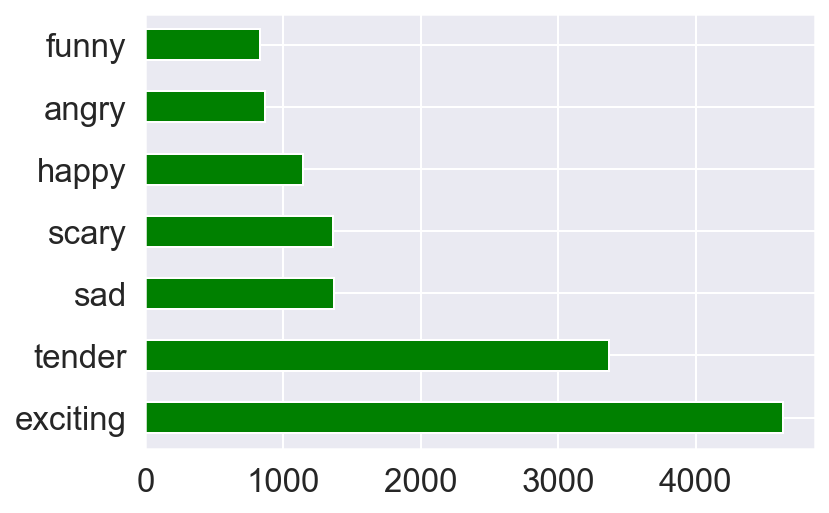

In [125]:
df['mood'].value_counts().plot(kind='barh', color='green')

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                        stratify=y, test_size=0.2, random_state=1)

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

# Logistic Regression

In [16]:
from sklearn import datasets, metrics
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

In [17]:
model_lr = LogisticRegression(C=2154.4346900318865, fit_intercept = True, penalty='l2', solver='liblinear', multi_class='ovr', max_iter=10000)

In [18]:
model_lr.fit(X_train, y_train)

LogisticRegression(C=2154.4346900318865, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=10000, multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [206]:
joblib.dump(model_lr, 'model_lr_test.jlib')

['model_lr_test.jlib']

In [19]:
print('Best estimator score on the full training set:')
print(model_lr.score(X_train, y_train))
print('Best estimator score on the test set:')
print(model_lr.score(X_test, y_test))

Best estimator score on the full training set:
0.5862481590574374
Best estimator score on the test set:
0.5870445344129555


In [31]:
predictions = model_lr.predict(X_train)

In [32]:
coefs_lr = model_lr.coef_
coefs_lr

array([[-1.90376514e-01,  2.73946209e-01,  8.67155975e-02,
         3.83049857e-01,  3.86931221e-01,  4.26468325e-02,
        -1.40199557e+00, -4.60038462e-01, -8.64229266e-01,
         6.57490579e-02,  1.46615659e-02,  1.51942968e-01,
         1.31783292e-01,  3.53973026e-02, -3.08726646e-01,
        -2.98357616e+00,  4.99626102e-01, -8.93149908e-02,
         6.25135549e+00, -4.19901832e-01,  1.39193801e-01,
        -3.95644558e+00, -1.71091930e-02, -3.14924215e-02,
         4.96965714e-01,  2.85429463e-02,  2.68032013e-01,
        -4.69813939e-01,  1.97798229e-01, -1.67593282e-01,
        -1.21798462e+00,  8.94834043e-01,  3.86320937e-02,
        -5.72731584e-01, -1.23279856e+00, -1.69490501e-03,
        -7.77751231e-02, -9.71871565e-01,  1.67536544e-02],
       [-7.78077042e-02, -3.15942728e-04,  3.24988000e-02,
        -9.80602299e-01, -1.09657942e-01, -4.35519515e-01,
        -1.03323993e+00, -5.83609168e-01, -9.36877956e-01,
         1.56322123e+00,  1.89744927e+00, -8.79185465e-

In [33]:
columns = X.columns

In [34]:
mood_features = ['exciting', 'tender', 'sad', 'scary', 'happy', 'angry', 'funny']

In [35]:
#function to print coeficients in descending order by each mood

mood_dict = {}

for score, mood in zip(coefs_lr, mood_features):
    temp=[]
    for score_name in zip(columns, score):
        temp.append(score_name)
    temp.sort(key=lambda x: x[1], reverse=True)
    mood_dict[mood]= temp

In [37]:
mood_dict

{'exciting': [('spec_bandwidth_3', 6.251355493843443),
  ('zcr_mean', 0.8948340433885602),
  ('spec_bandwidth_2_std', 0.49962610237757643),
  ('spectral_rolloff', 0.4969657137638393),
  ('chroma_stft_std', 0.3869312207491929),
  ('chroma_stft', 0.38304985686848747),
  ('log_mel_spec_std', 0.2739462089573281),
  ('spectral_rolloff_skew', 0.2680320129787566),
  ('spectral_contrast_std', 0.19779822869861854),
  ('chroma_cens_means_skew', 0.1519429677422688),
  ('spec_bandwidth_3_skew', 0.1391938012527295),
  ('specral_centroids', 0.13178329240777595),
  ('log_mel_spec_skew', 0.08671559751966416),
  ('chroma_cens_means', 0.06574905790517248),
  ('chroma_stft_skew', 0.042646832476651624),
  ('zcr_std', 0.03863209371248645),
  ('specral_centroids_std', 0.03539730260269767),
  ('spectral_rolloff_std', 0.02854294629480708),
  ('tonnetz_skew', 0.01675365443590068),
  ('chroma_cens_means_std', 0.014661565897030871),
  ('mfcc_skew', -0.0016949050077537215),
  ('spec_bandwidth_4_std', -0.017109192

In [184]:
import scikitplot as skplt
from matplotlib.colors import ListedColormap
from sklearn.metrics import classification_report, confusion_matrix
from matplotlib import pyplot as plt
cmap = ListedColormap(sns.color_palette("husl", len(model_lr.classes_)))

In [72]:
predictions_train = model_lr.predict(X_train)
predictions_test = model_lr.predict(X_test)

probabilities_train = model_lr.predict_proba(X_train)
probabilities_test = model_lr.predict_proba(X_test)

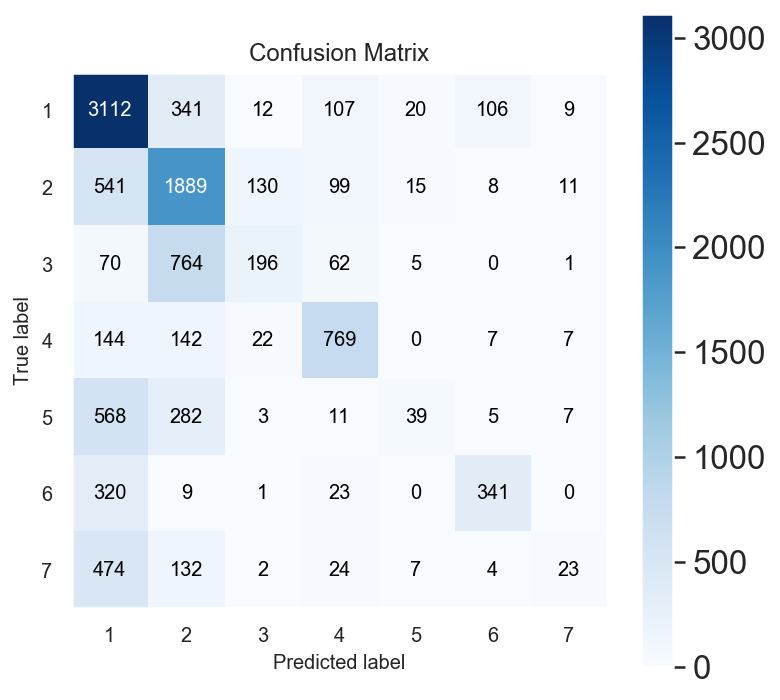

In [73]:
skplt.metrics.plot_confusion_matrix(y_train, predictions_train, figsize=(6,6))
plt.show()

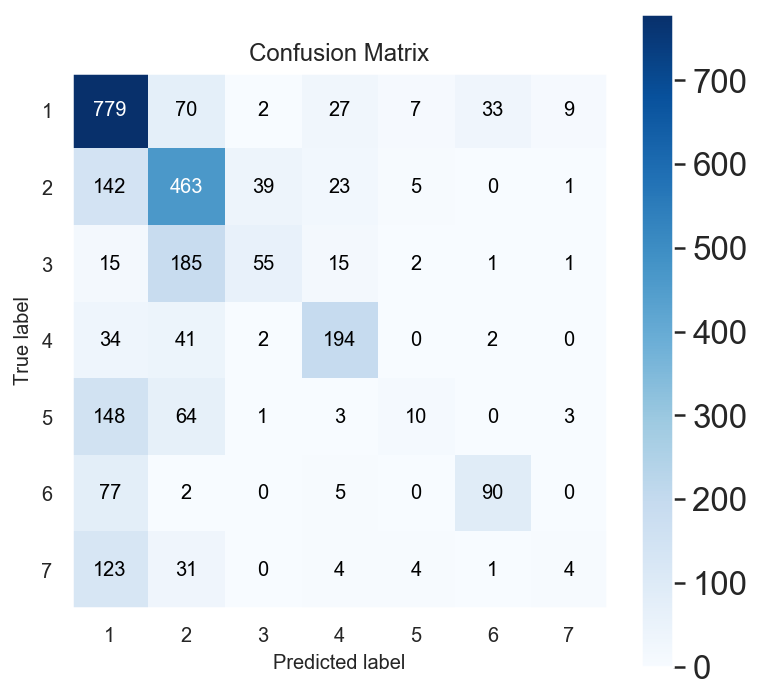

In [74]:
skplt.metrics.plot_confusion_matrix(y_test, predictions_test, figsize=(6, 6))
plt.show()

In [76]:
print(classification_report(y_train, predictions_train))

              precision    recall  f1-score   support

           1       0.60      0.84      0.70      3707
           2       0.53      0.70      0.60      2693
           3       0.54      0.18      0.27      1098
           4       0.70      0.70      0.70      1091
           5       0.45      0.04      0.08       915
           6       0.72      0.49      0.59       694
           7       0.40      0.03      0.06       666

    accuracy                           0.59     10864
   macro avg       0.56      0.43      0.43     10864
weighted avg       0.57      0.59      0.53     10864



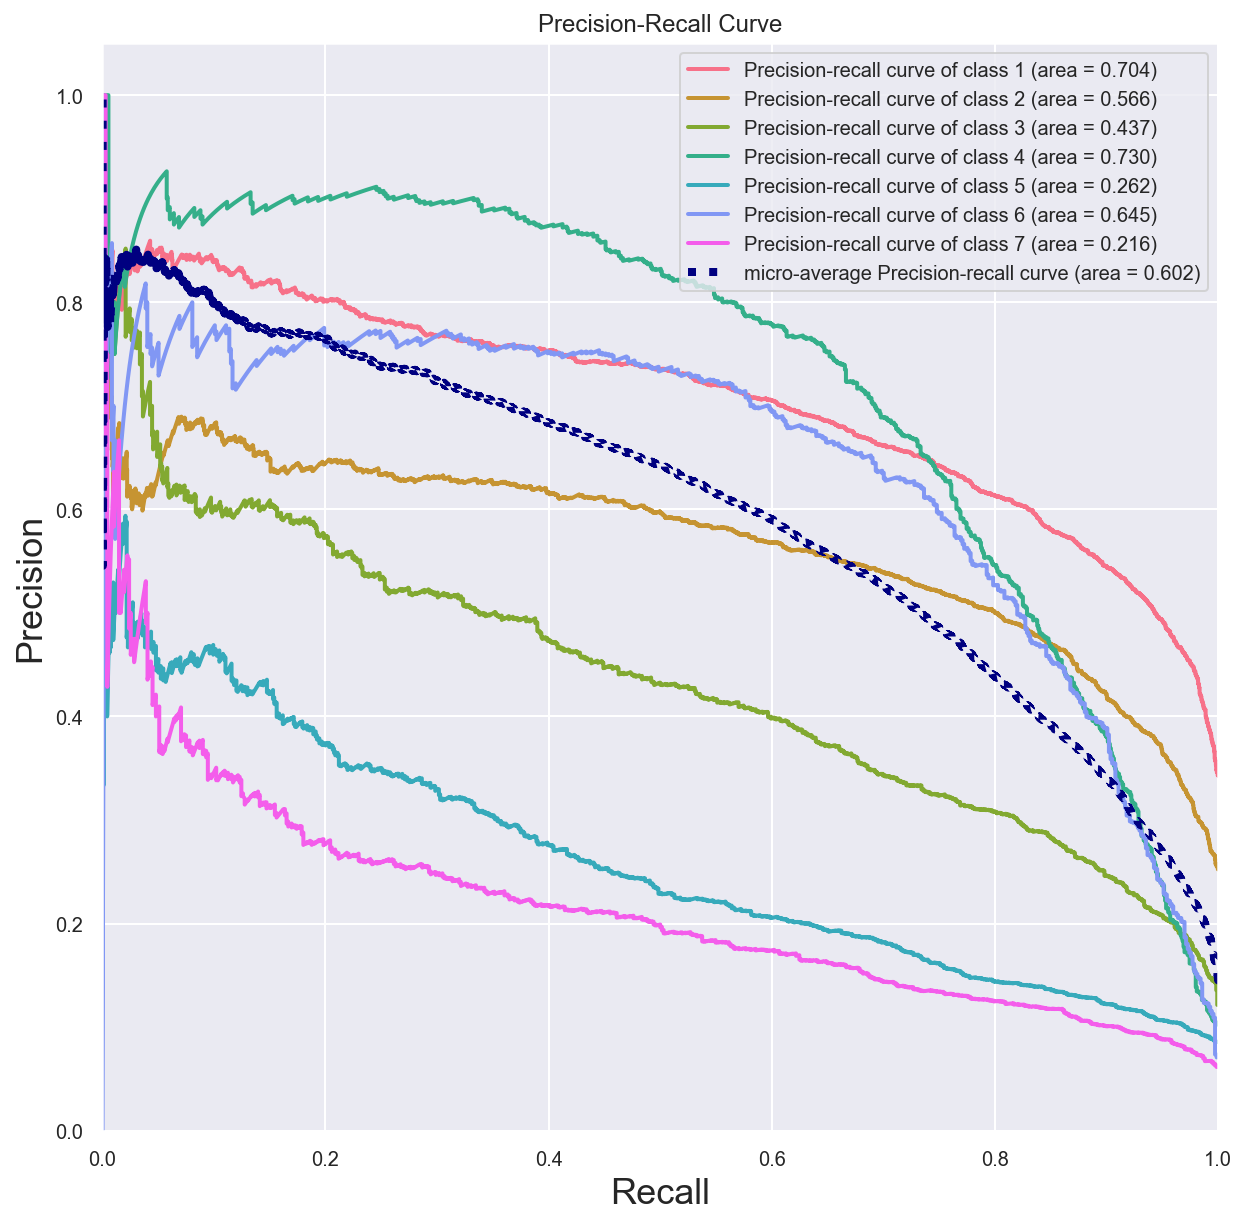

In [77]:
skplt.metrics.plot_precision_recall(y_train, probabilities_train, cmap=cmap, figsize=(10, 10))
plt.show()

# Support Vector Machines

In [171]:
from sklearn.svm import SVC, LinearSVC

In [208]:
def get_accuracy(model, X_train, y_train, X_test, y_test, cv=5):
    model.fit(X_train, y_train)
    scores_train = cross_val_score(model, X_train, y_train, cv=cv)
    predictions_test = model.predict(X_test)
    sm = scores_train.mean()
    print("Average training score: {:0.3}".format(sm))
    print("Test score: {:0.3}".format(model.score(X_test, y_test)))
    return predictions_test


def print_cm_cr(y_true, y_pred):
    """prints the confusion matrix and the classification report"""
    confusion = pd.crosstab(y_true, y_pred, rownames=['Actual'], colnames=[
                            'Predicted'], margins=True)
    print(confusion)
    print()
    print(metrics.classification_report(y_true, y_pred))
    
model_svc = SVC(kernel='rbf', gamma='scale', class_weight='balanced', probability=True)

model_svc.fit(X_train, y_train)
print(model_svc.score(X_train, y_train))

model_svc.predict(X_test)
print(model_svc.score(X_test, y_test))

predictions = get_accuracy(model_svc, X_train, y_train, X_test, y_test, cv=5)
print_cm_cr(y_test, predictions)

joblib.dump(model_svc, 'model_svc_test.jlib')

0.5622238586156112
0.49135075450864923
Average training score: 0.49
Test score: 0.491
Predicted    1    2    3    4    5    6    7   All
Actual                                            
1          424   50   13   57  110  120  153   927
2           43  247  221   34   79    6   43   673
3            9   64  160   20   15    0    6   274
4           12   12   23  206    4    7    9   273
5           64   29   19    4   73    6   34   229
6            6    0    1    6    1  154    6   174
7           35   17    8    8   21    7   71   167
All        593  419  445  335  303  300  322  2717

              precision    recall  f1-score   support

           1       0.72      0.46      0.56       927
           2       0.59      0.37      0.45       673
           3       0.36      0.58      0.45       274
           4       0.61      0.75      0.68       273
           5       0.24      0.32      0.27       229
           6       0.51      0.89      0.65       174
           7       0.22 

['model_svc_test.jlib']

In [187]:
predictions_train = model_svc.predict(X_train)
predictions_test = model_svc.predict(X_test)

probabilities_train = model_svc.predict_proba(X_train)
probabilities_test = model_svc.predict_proba(X_test)

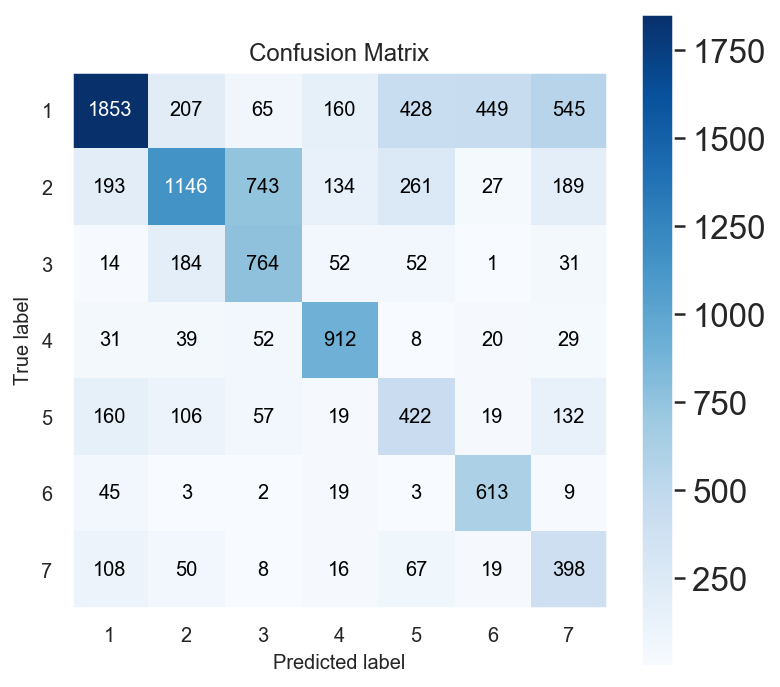

In [188]:
skplt.metrics.plot_confusion_matrix(y_train, predictions_train, figsize=(6,6))
plt.show()

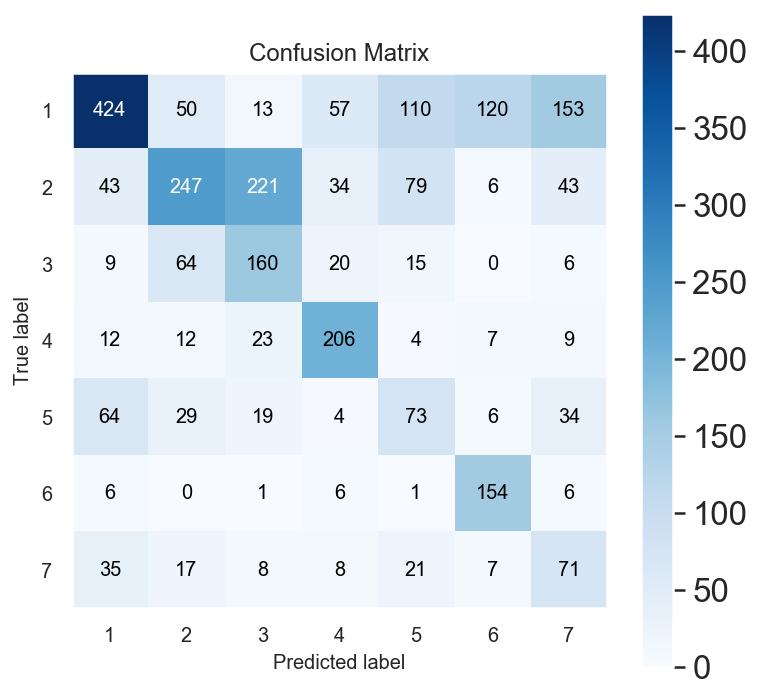

In [189]:
skplt.metrics.plot_confusion_matrix(y_test, predictions_test, figsize=(6, 6))
plt.show()

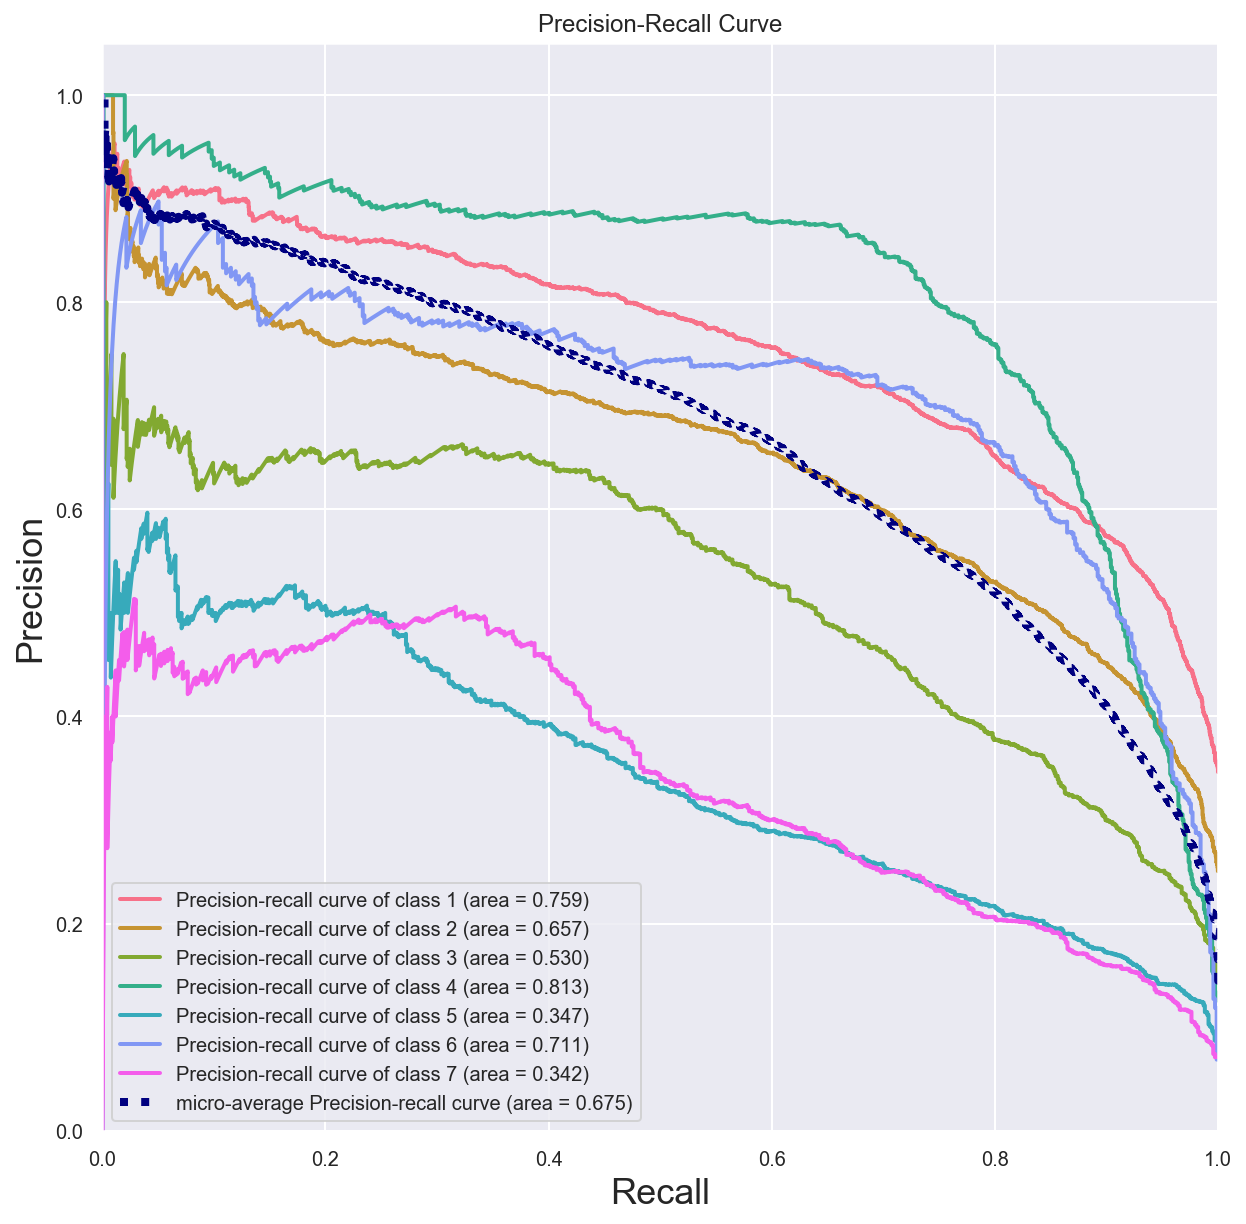

In [190]:
skplt.metrics.plot_precision_recall(y_train, probabilities_train, cmap=cmap, figsize=(10, 10))
plt.show()

# Random Forests

In [96]:
from sklearn.ensemble import RandomForestClassifier

In [97]:
params = {
        'max_samples': [None, 5, 15, 45,],
        'max_leaf_nodes': [5, 20, 50],   
        'min_samples_leaf': [5, 20, 50],        
        'n_estimators': [500], 
        'bootstrap': [True],
        'max_depth': [5, 20, 50],
        'max_features': [None, 5, 20, 50]}

In [98]:
gs_rf = GridSearchCV(estimator=RandomForestClassifier(),
                    param_grid=params, 
                    cv=5,
                    n_jobs=2,
                    verbose=2)
gs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:  5.0min
[Parallel(n_jobs=2)]: Done 158 tasks      | elapsed: 18.9min
[Parallel(n_jobs=2)]: Done 361 tasks      | elapsed: 23.8min
[Parallel(n_jobs=2)]: Done 644 tasks      | elapsed: 34.5min
[Parallel(n_jobs=2)]: Done 1009 tasks      | elapsed: 59.3min
[Parallel(n_jobs=2)]: Done 1454 tasks      | elapsed: 78.1min
[Parallel(n_jobs=2)]: Done 1981 tasks      | elapsed: 112.6min
[Parallel(n_jobs=2)]: Done 2160 out of 2160 | elapsed: 113.0min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [99]:
print('Best Parameters:')
print(gs_rf.best_params_)
print('Best estimator mean cross validated training score:')
print(gs_rf.best_score_)
print('Best estimator score on the full training set:')
print(gs_rf.score(X_train, y_train))
print('Best estimator score on the test set:')
print(gs_rf.score(X_test, y_test))
#print('Best estimator coefficients:')
#print(gs.best_estimator_.coef_)

Best Parameters:
{'bootstrap': True, 'max_depth': 20, 'max_features': 20, 'max_leaf_nodes': 50, 'max_samples': None, 'min_samples_leaf': 20, 'n_estimators': 500}
Best estimator mean cross validated training score:
0.5648014007503777
Best estimator score on the full training set:
0.5914027982326951
Best estimator score on the test set:
0.5704821494295178


In [209]:
joblib.dump(gs_rf, 'gs_rf_test.jlib')

['gs_rf_test.jlib']

In [191]:
predictions_train = gs_rf.predict(X_train)
predictions_test = gs_rf.predict(X_test)

probabilities_train = gs_rf.predict_proba(X_train)
probabilities_test = gs_rf.predict_proba(X_test)

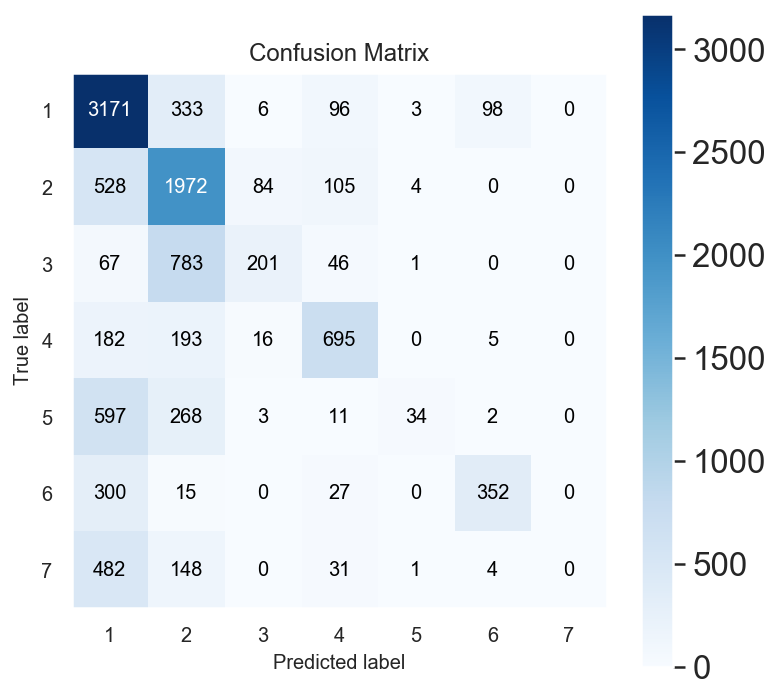

In [192]:
skplt.metrics.plot_confusion_matrix(y_train, predictions_train, figsize=(6,6))
plt.show()

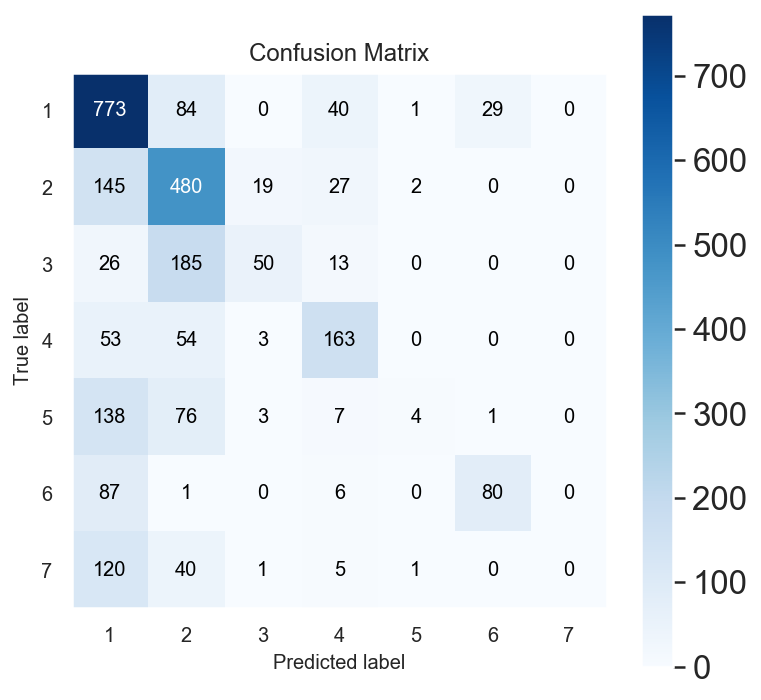

In [193]:
skplt.metrics.plot_confusion_matrix(y_test, predictions_test, figsize=(6, 6))
plt.show()

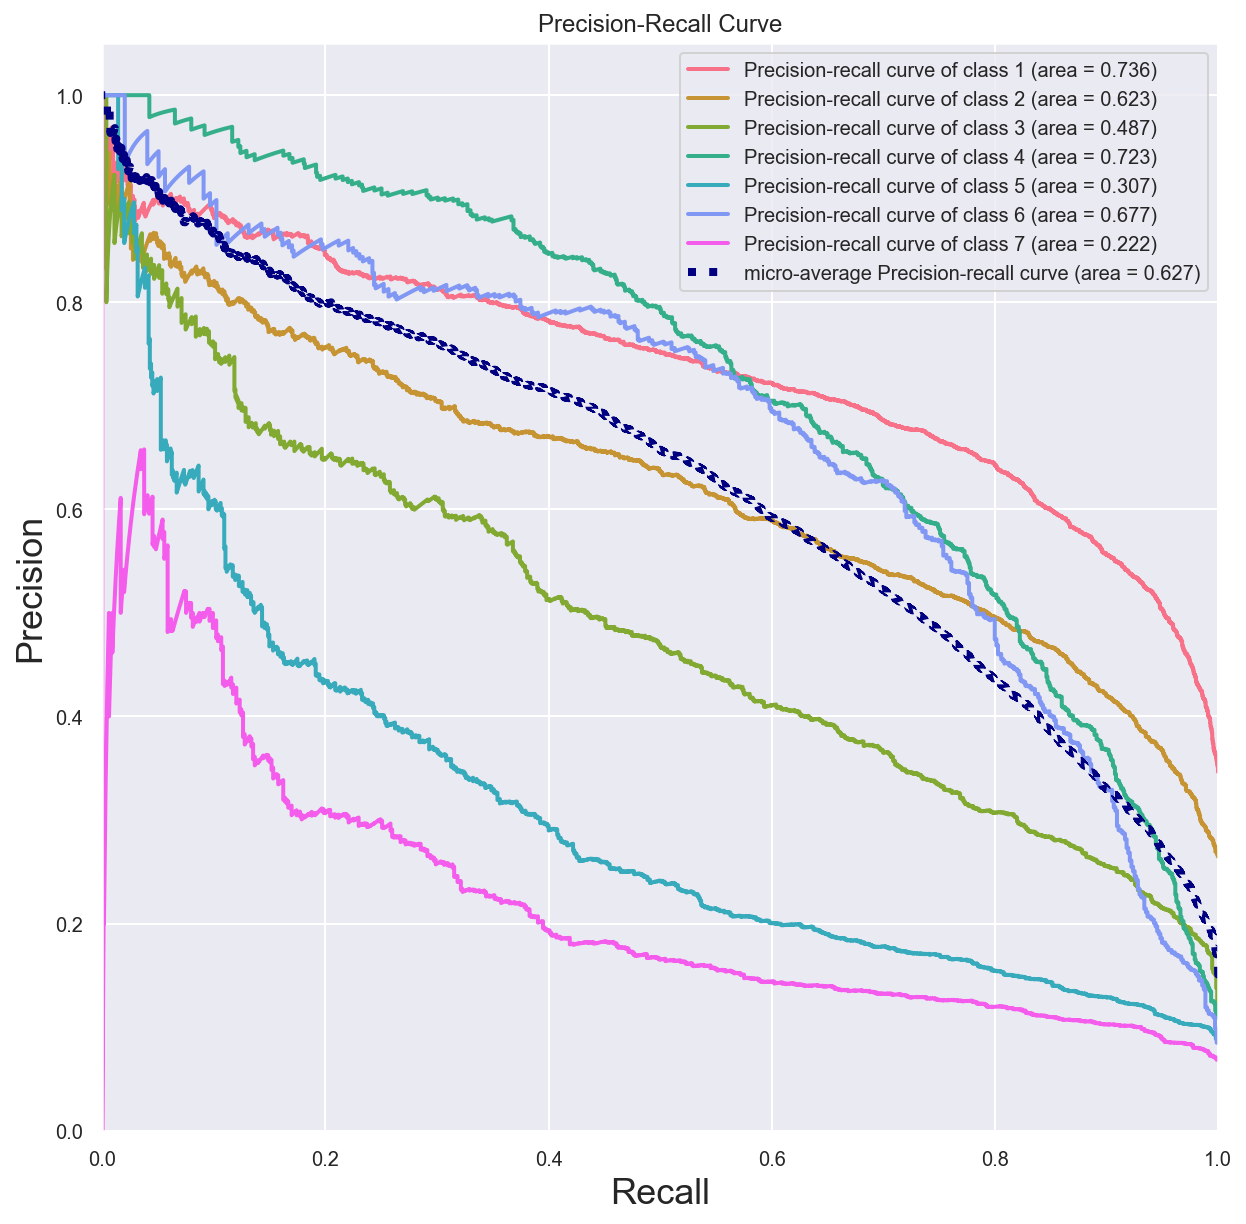

In [195]:
skplt.metrics.plot_precision_recall(y_train, probabilities_train, cmap=cmap, figsize=(10, 10))
plt.show()

# Feature Importances

In [100]:
fi = gs_rf.best_estimator_.feature_importances_
fi

array([0.0143645 , 0.00304786, 0.00626188, 0.11329066, 0.04860987,
       0.04939707, 0.01776014, 0.00813985, 0.00119664, 0.1017465 ,
       0.15460574, 0.00124863, 0.05427847, 0.00563026, 0.00770278,
       0.02120207, 0.00167018, 0.00435711, 0.01242751, 0.00169824,
       0.00200833, 0.01389123, 0.00247741, 0.00181385, 0.06592364,
       0.00648378, 0.00210315, 0.02842816, 0.00842257, 0.01112931,
       0.00420641, 0.00472984, 0.0036225 , 0.02708467, 0.05061547,
       0.02263262, 0.00128438, 0.11334659, 0.00116015])

In [101]:
columns = ['log_mel_spec', 'log_mel_spec_std', 'log_mel_spec_skew',
       'chroma_stft', 'chroma_stft_std', 'chroma_stft_skew', 'chroma_cqt_mean',
       'chroma_cqt_mean_std', 'chroma_cqt_mean_skew', 'chroma_cens_means',
       'chroma_cens_means_std', 'chroma_cens_means_skew', 'specral_centroids',
       'specral_centroids_std', 'specral_centroids_skew', 'spec_bandwidth_2',
       'spec_bandwidth_2_std', 'spec_bandwidth_2_skew', 'spec_bandwidth_3',
       'spec_bandwidth_3_std', 'spec_bandwidth_3_skew', 'spec_bandwidth_4',
       'spec_bandwidth_4_std', 'spec_bandwidth_4_skew', 'spectral_rolloff',
       'spectral_rolloff_std', 'spectral_rolloff_skew', 'spectral_contrast',
       'spectral_contrast_std', 'spectral_contrast_skew', 'zcr_sum',
       'zcr_mean', 'zcr_std', 'mfcc', 'mfcc_std', 'mfcc_skew', 'tonnetz_mean',
       'tonnetz_std', 'tonnetz_skew']

In [102]:
mood_dict = {}

for score, mood in zip(coefs_lr, mood_features):
    temp=[]
    for score_name in zip(columns, score):
        temp.append(score_name)
    temp.sort(key=lambda x: x[1], reverse=True)
    mood_dict[mood]= temp

In [103]:
df_fi= pd.DataFrame()

In [104]:
df_fi['feature']  = columns
df_fi['importance']  = fi
df_fi = df_fi.set_index('feature')

In [105]:
df_fi.sort_values(by='importance', ascending=True)

,importance
feature,
tonnetz_skew,0.001160
chroma_cqt_mean_skew,0.001197
chroma_cens_means_skew,0.001249
tonnetz_mean,0.001284
spec_bandwidth_2_std,0.001670
spec_bandwidth_3_std,0.001698
spec_bandwidth_4_skew,0.001814
spec_bandwidth_3_skew,0.002008
spectral_rolloff_skew,0.002103


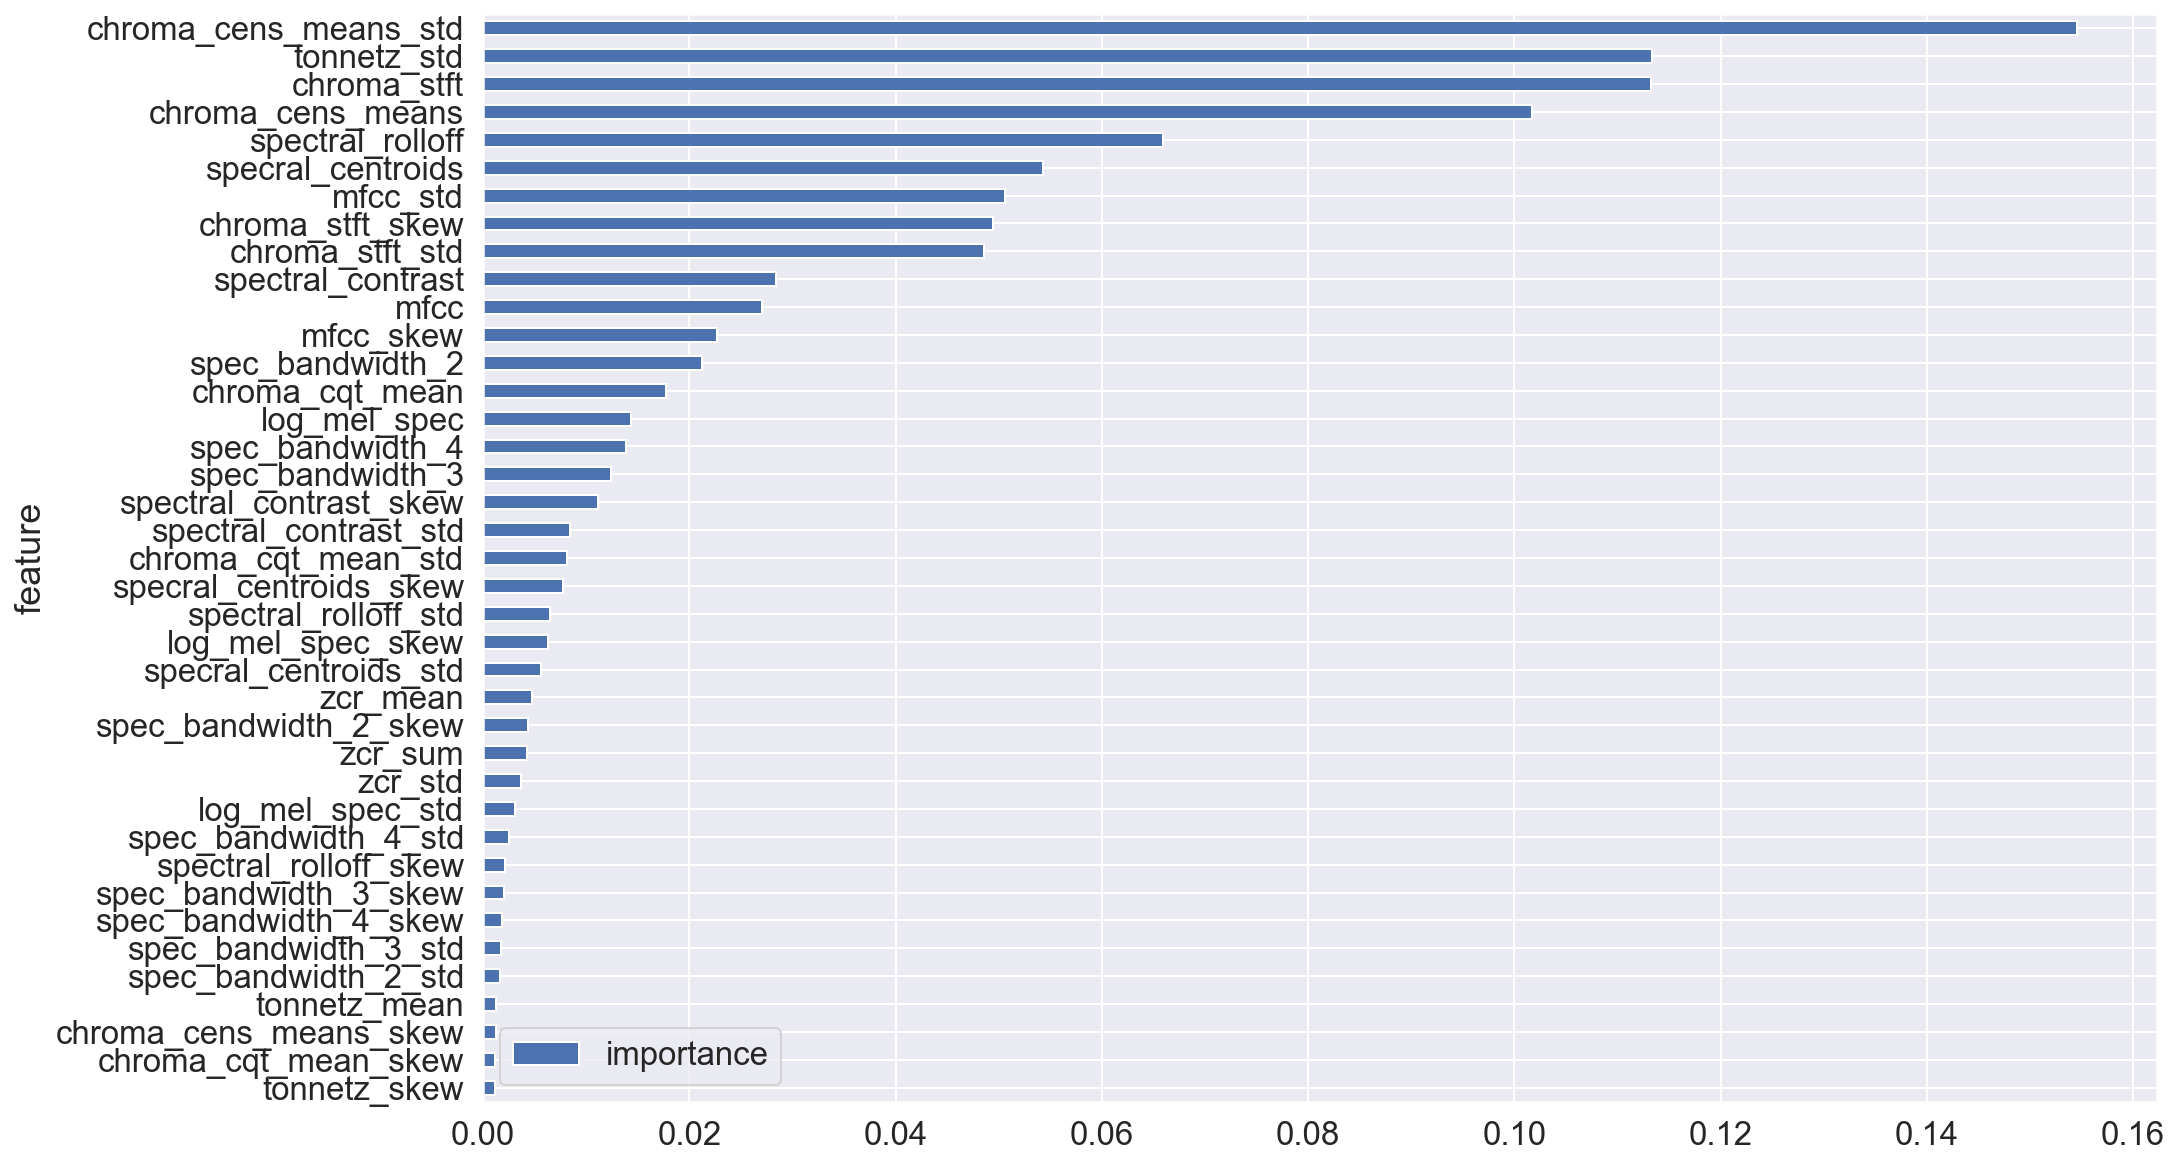

In [106]:
df_fi.sort_values(by='importance', ascending=True).plot(kind='barh', figsize=(15,10))

# Networks:

In [199]:
from sklearn.base import TransformerMixin
from sklearn.preprocessing import LabelBinarizer, OneHotEncoder
from sklearn.pipeline import make_pipeline, make_union
from sklearn.impute import SimpleImputer as Imputer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.neural_network import MLPClassifier

In [210]:
mlp = MLPClassifier(solver='lbfgs',
                    alpha=10**(-10),
                    hidden_layer_sizes=(12, 12, 12, 12, 12, 12, 12, 12),
                    activation='identity',
                    random_state=1,
                    batch_size='auto',
                   max_iter=10000)
mlp.fit(X_train, y_train)
print(metrics.accuracy_score(y_test, mlp.predict(X_test)))

joblib.dump(mlp, 'mlp_test.jlib')

0.5936694884063305


['mlp_test.jlib']

In [201]:
print([coef.shape for coef in clf.coefs_])
print(sum([np.prod(coef.shape) for coef in clf.coefs_]))

[(39, 12), (12, 12), (12, 12), (12, 12), (12, 12), (12, 12), (12, 12), (12, 12), (12, 7)]
1560


In [202]:
predictions_train = clf.predict(X_train)
predictions_test = clf.predict(X_test)

probabilities_train = clf.predict_proba(X_train)
probabilities_test = clf.predict_proba(X_test)

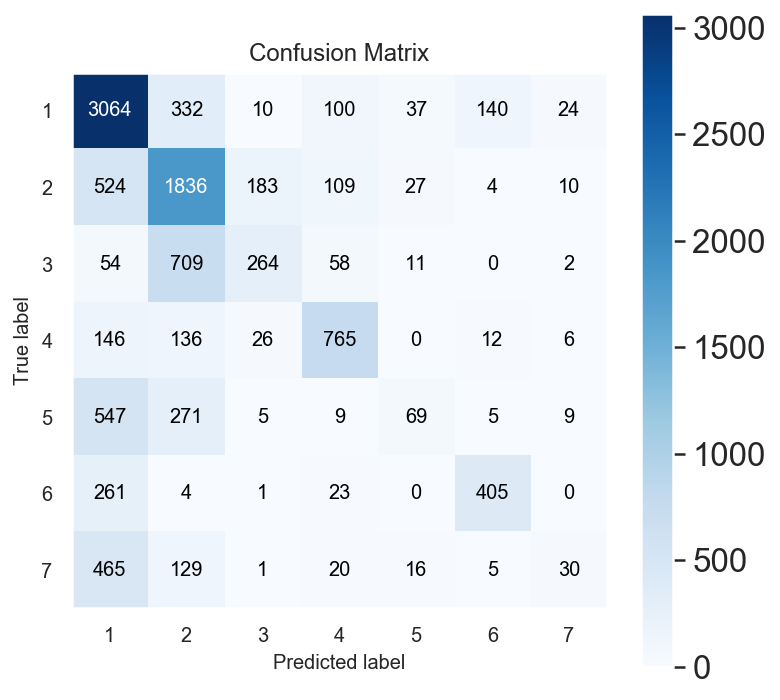

In [203]:
skplt.metrics.plot_confusion_matrix(y_train, predictions_train, figsize=(6,6))
plt.show()

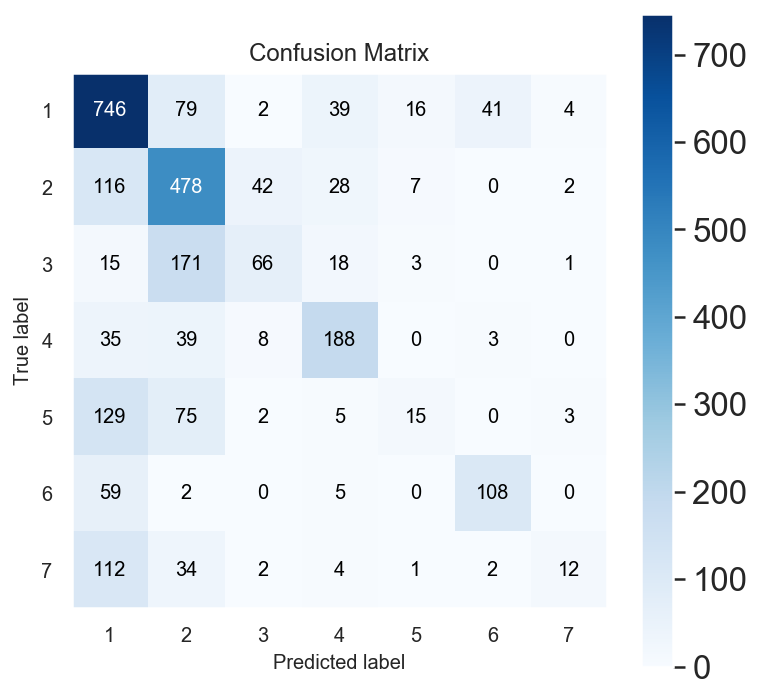

In [204]:
skplt.metrics.plot_confusion_matrix(y_test, predictions_test, figsize=(6, 6))
plt.show()

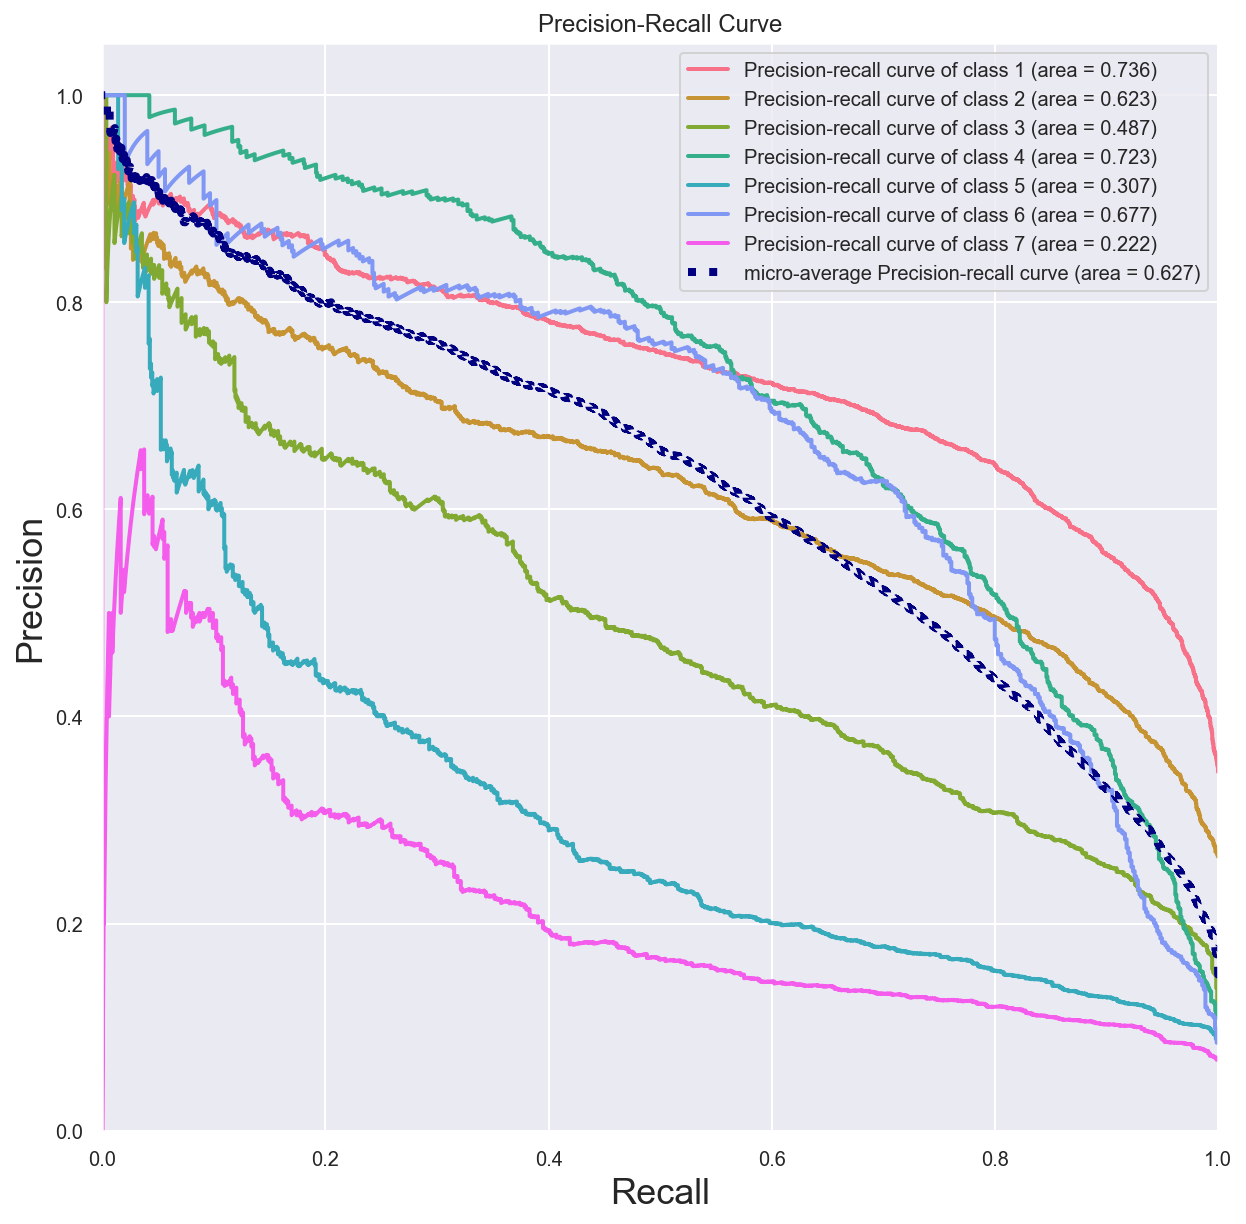

In [195]:
skplt.metrics.plot_precision_recall(y_train, probabilities_train, cmap=cmap, figsize=(10, 10))
plt.show()